In [ ]:
from google.colab import drive #using google drive for storage
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import sklearn
from sklearn import preprocessing
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.preprocessing import LabelEncoder, StandardScaler
import csv
import os
from tensorflow import keras
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization 
from keras import regularizers
import matplotlib.pyplot as plt
#from keras.utils import plot_model
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import pickle
from keras.utils import np_utils
from keras import optimizers
from keras.models import load_model

FeatureVector = []
Y_train = []
Y_val = []
YTest = []

In [ ]:
#loading the model
#model = load_model("trained_models/DrowDet_model(output4).hdf5")


basename = os.path.basename("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY") 
dir= os.path.dirname('gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY')


for (root,dirs,files) in os.walk('gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new', topdown=True):
    for x in files:
        files=os.path.join(root, x)
        print(files)

        with open(files, 'r') as f:
          for sline in f:
            sline = sline.rstrip('\n')
            data = sline.split(',')
            csvfile = []
            for i in range(0,7):
                sdata = float(data[i])
                csvfile.append(sdata)
            FeatureVector.append(csvfile)

sFeatureVector = np.array(FeatureVector)

#shuffling the data
random.Random(4).shuffle(sFeatureVector)

#splitting the training and testing data
splitTrainStart = 0
splitTrainEnd = int(0.7*len(sFeatureVector))
splitValStart = int(splitTrainEnd)
splitValEnd = int(splitValStart + 0.2*len(sFeatureVector))
splitTestStart = int(splitValEnd)
splitTestEnd = int(splitTestStart + 0.1*len(sFeatureVector))


#dataset
Xtrain = sFeatureVector[splitTrainStart:splitTrainEnd, 0:6]
Ytrain = sFeatureVector[splitTrainStart:splitTrainEnd, -1]
Xval = sFeatureVector[splitValStart:splitValEnd, 0:6]
Yval = sFeatureVector[splitValStart:splitValEnd, -1]
X_Test = sFeatureVector[splitTestStart:splitTestEnd, 0:6]
Y_Test = sFeatureVector[splitTestStart:splitTestEnd, -1]

gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/1-1.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/1-2.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/1-3.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/2-1.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/2-2.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/2-3.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/3-1.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/3-2.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/3-3.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/4-1.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/4-2.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/4-3.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/5-1.csv
gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/csvfile_new/5-2.csv
gdrive/My Drive/DROZY.zip (Unzippe

In [ ]:
sFeatureVector.shape

(105101, 7)

In [ ]:
Xtrain[0]

array([ 0.       ,  0.       ,  0.       ,  0.3      ,  0.       ,
       10.2447297])

In [ ]:
'''
#dumping the data
pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowTrainRevised.pickle","rb")
Xtrain=pickle.load(pickle_off)

pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowTrainRevised.pickle","rb")
Ytrain=pickle.load(pickle_off)

pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowValRevised.pickle","rb")
Xval=pickle.load(pickle_off)

pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowValRevised.pickle","rb")
Yval=pickle.load(pickle_off)

pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowTestRevised.pickle","rb")
X_Test=pickle.load(pickle_off)

pickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowTestRevised.pickle","rb")
Y_Test=pickle.load(pickle_off)
'''

'\n#dumping the data\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowTrainRevised.pickle","rb")\nXtrain=pickle.load(pickle_off)\n\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowTrainRevised.pickle","rb")\nYtrain=pickle.load(pickle_off)\n\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowValRevised.pickle","rb")\nXval=pickle.load(pickle_off)\n\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowValRevised.pickle","rb")\nYval=pickle.load(pickle_off)\n\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/xDrowTestRevised.pickle","rb")\nX_Test=pickle.load(pickle_off)\n\npickle_off=open("gdrive/My Drive/DROZY.zip (Unzipped Files)/DROZY/DrowDetSys/yDrowTestRevised.pickle","rb")\nY_Test=pickle.load(pickle_off)\n'

In [ ]:
myset = set(Ytrain)
print(myset)

{2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0}


In [ ]:
#finding the max from the data columnwise
max1 = Xtrain[:,0].max()
max2 = Xtrain[:,1].max()
max3 = Xtrain[:,2].max()
max4 = Xtrain[:,3].max()
max5 = Xtrain[:,4].max()
max6 = Xtrain[:,5].max()

#scaling the training data
NormTrain1 = Xtrain[:,0]/max1
NormTrain2 = Xtrain[:,1]/max2
NormTrain3 = Xtrain[:,2]/max3
NormTrain4 = Xtrain[:,3]/max4
NormTrain5 = Xtrain[:,4]/max5
NormTrain6 = Xtrain[:,5]/max6


#scaling the validating data
NormVal1 = Xval[:,0]/max1
NormVal2 = Xval[:,1]/max2
NormVal3 = Xval[:,2]/max3
NormVal4 = Xval[:,3]/max4
NormVal5 = Xval[:,4]/max5
NormVal6 = Xval[:,5]/max6

#scaling the testing data
NormTest1 = X_Test[:,0]/max1
NormTest2 = X_Test[:,1]/max2
NormTest3 = X_Test[:,2]/max3
NormTest4 = X_Test[:,3]/max4
NormTest5 = X_Test[:,4]/max5
NormTest6 = X_Test[:,5]/max6


#concatenating arrays to prepare training, validating and testing data
Xtrain = np.vstack((NormTrain1, NormTrain2, NormTrain3, NormTrain4, NormTrain5, NormTrain6))
Xtrain = Xtrain.T
Xval = np.vstack((NormVal1, NormVal2, NormVal3, NormVal4, NormVal5, NormVal6)) 
Xval = Xval.T
X_Test = np.vstack((NormTest1, NormTest2, NormTest3,NormTest4, NormTest5, NormTest6))
X_Test = X_Test.T

In [ ]:
Xtrain

array([[0.        , 0.        , 0.        , 0.34883721, 0.        ,
        0.02845763],
       [0.        , 0.        , 0.        , 0.3255814 , 0.        ,
        0.02898833],
       [0.        , 0.        , 0.        , 0.34883721, 0.        ,
        0.0289893 ],
       ...,
       [0.22048239, 0.89705882, 0.26222222, 0.44186047, 0.        ,
        0.00916061],
       [0.07111268, 0.42647059, 0.05674847, 0.41860465, 0.        ,
        0.03887736],
       [0.04527133, 0.07352941, 0.01010101, 0.34883721, 0.        ,
        0.02858552]])

In [ ]:
Xtrain.shape

(73570, 6)

In [ ]:

#relabeling the levels
for i in range(len(Ytrain)):
	if Ytrain[i]==2 or Ytrain[i] ==3 or Ytrain[i]== 4:
		label = 1
		Y_train.append(label)
	elif Ytrain[i]==6 or Ytrain[i]== 5:
		label = 2
		Y_train.append(label)
	else:
		label = 3
		Y_train.append(label)



for i in range(len(Yval)):
	if Yval[i]==2 or Yval[i]==3 or Yval[i]== 4:
		label = 1
		Y_val.append(label)
	elif Yval[i]==6 or Yval[i]== 5:
		label = 2
		Y_val.append(label)
	else:
		label = 3
		Y_val.append(label)


for i in range(len(Y_Test)):
	if Y_Test[i]==2 or Y_Test[i]==3 or Y_Test[i]==4:
		label = 1
		YTest.append(label)
	elif Y_Test[i]==5 or Y_Test[i]==6:
		label = 2
		YTest.append(label)
	else:
		label = 3
		YTest.append(label)


In [ ]:
# Ytrain = [cleaning(x) for x in Ytrain]
# Y_Test = [cleaning(x) for x in Ytrain]
# Yval = [cleaning(x) for x in Ytrain]

In [ ]:

Ytrain = np.array(Y_train)
Yval = np.array(Y_val)
Y_Test = np.array(YTest)	


In [ ]:
myset = set(Ytrain)
print(myset)

{1, 2, 3}


In [ ]:
Ytrain = np_utils.to_categorical(Ytrain)
Yval = np_utils.to_categorical(Yval)
Y_Test = np_utils.to_categorical(Y_Test)

In [ ]:
Ytrain

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:




#one h0t encode outputs




#designing the model
model=Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dense(16, input_dim=6, activation='relu'))
model.add(Dense(4, activation='softmax', use_bias=False))

#compile the model
#adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 


#fit the model
checkpoint = keras.callbacks.ModelCheckpoint(filepath="trained_models/DrowDet_model(output4).hdf5", period=1)
tbCallBack = keras.callbacks.TensorBoard(log_dir='./scalar', histogram_freq=0, write_graph=True, write_images=True)
history=model.fit(Xtrain, Ytrain, epochs=50, batch_size=256, callbacks=[checkpoint, tbCallBack], validation_data=(Xval,Yval))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


288/288 [==============================] - 2s 3ms/step - loss: 0.8878 - accuracy: 0.6584 - val_loss: 0.9569 - val_accuracy: 0.6192
Epoch 2/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.7215 - val_loss: 0.9776 - val_accuracy: 0.6384
Epoch 3/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6085 - accuracy: 0.7439 - val_loss: 0.9194 - val_accuracy: 0.6675
Epoch 4/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5714 - accuracy: 0.7546 - val_loss: 0.8989 - val_accuracy: 0.6770
Epoch 5/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5467 - accuracy: 0.7685 - val_loss: 0.8939 - val_accuracy: 0.6799
Epoch 6/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5144 - accuracy: 0.7902 - val_loss: 0.8658 - val_accuracy: 0.6987
Epoch 7/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.8078 - val_loss: 0.8364 - val_accuracy: 0.7174
Epoch 8/50
288/28

(0.0, 2.0)

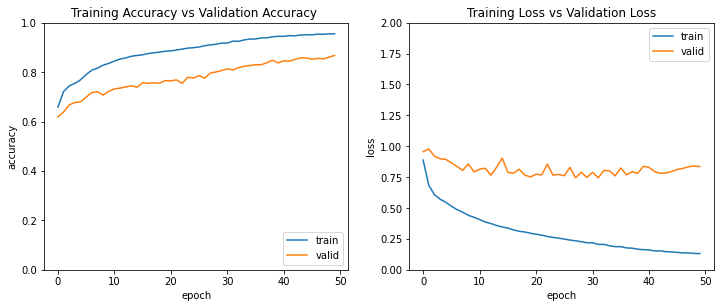

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('Training Accuracy vs Validation Accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])

In [ ]:

#calculating the testing score of the data
predictions=model.predict(X_Test)
prob3=predictions.argmax(axis=1)
y_true=Y_Test.argmax(axis=1)
y_prediction=prob3

#confusion matrix
results = confusion_matrix(y_true, y_prediction) 
print('testing Confusion Matrix :')
print(results) 
print('testing Accuracy Score :',accuracy_score(y_true, y_prediction)) 
print('testing Report : ')
print(classification_report(y_true, y_prediction)) 



testing Confusion Matrix :
[[4465   97  703]
 [ 492  973  139]
 [1032   75 2534]]
testing Accuracy Score : 0.7585156993339677
testing Report : 
              precision    recall  f1-score   support

           1       0.75      0.85      0.79      5265
           2       0.85      0.61      0.71      1604
           3       0.75      0.70      0.72      3641

    accuracy                           0.76     10510
   macro avg       0.78      0.72      0.74     10510
weighted avg       0.76      0.76      0.76     10510



In [ ]:
#designing the model
model=Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(4, activation='softmax', use_bias=False))

#compile the model
#adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 


#fit the model
checkpoint = keras.callbacks.ModelCheckpoint(filepath="trained_models/DrowDet_model(output4).hdf5", period=1)
tbCallBack = keras.callbacks.TensorBoard(log_dir='./scalar', histogram_freq=0, write_graph=True, write_images=True)
history=model.fit(Xtrain, Ytrain, epochs=100, batch_size=256, callbacks=[checkpoint, tbCallBack], validation_data=(Xval,Yval))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


288/288 [==============================] - 1s 3ms/step - loss: 0.9180 - accuracy: 0.6412 - val_loss: 0.9160 - val_accuracy: 0.5706
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.7486 - accuracy: 0.6928 - val_loss: 0.9039 - val_accuracy: 0.6236
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.7095 - val_loss: 0.8877 - val_accuracy: 0.6403
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.7232 - val_loss: 0.8807 - val_accuracy: 0.6527
Epoch 5/100
288/288 [==============================] - 1s 3ms/step - loss: 0.6403 - accuracy: 0.7356 - val_loss: 0.8839 - val_accuracy: 0.6459
Epoch 6/100
288/288 [==============================] - 1s 3ms/step - loss: 0.6096 - accuracy: 0.7452 - val_loss: 0.8504 - val_accuracy: 0.6651
Epoch 7/100
288/288 [==============================] - 1s 3ms/step - loss: 0.5725 - accuracy: 0.7582 - val_loss: 0.8630 - val_accuracy: 0.6678
Epoch 8/100

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('Training Accuracy vs Validation Accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])

In [ ]:
#calculating the testing score of the data
predictions=model.predict(X_Test)
prob3=predictions.argmax(axis=1)
y_true=Y_Test.argmax(axis=1)
y_prediction=prob3

#confusion matrix
results = confusion_matrix(y_true, y_prediction) 
print('testing Confusion Matrix :')
print(results) 
print('testing Accuracy Score :',accuracy_score(y_true, y_prediction)) 
print('testing Report : ')
print(classification_report(y_true, y_prediction)) 

In [ ]:
from keras.layers import LSTM
#designing the model
model=Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(4, activation='softmax', use_bias=False))

#compile the model
#adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 


#fit the model
checkpoint = keras.callbacks.ModelCheckpoint(filepath="trained_models/DrowDet_model(output4).hdf5", period=1)
tbCallBack = keras.callbacks.TensorBoard(log_dir='./scalar', histogram_freq=0, write_graph=True, write_images=True)
history=model.fit(Xtrain, Ytrain, epochs=50, batch_size=256, callbacks=[checkpoint, tbCallBack], validation_data=(Xval,Yval))
















In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('Training Accuracy vs Validation Accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])


In [ ]:
predictions=model.predict(X_Test)
prob3=predictions.argmax(axis=1)
y_true=Y_Test.argmax(axis=1)
y_prediction=prob3

#confusion matrix
results = confusion_matrix(y_true, y_prediction) 
print('testing Confusion Matrix :')
print(results) 
print('testing Accuracy Score :',accuracy_score(y_true, y_prediction)) 
print('testing Report : ')
print(classification_report(y_true, y_prediction)) 


In [ ]:
X_test_lstm = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [ ]:
X_train_lstm = Xtrain.reshape(Xtrain.shape[0], 1, Xtrain.shape[1])
Xval_lstm = Xval.reshape(Xval.shape[0], 1, Xval.shape[1])

In [ ]:
#LSTM
import numpy as np
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
#from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()

model.add(LSTM(512, return_sequences=True,
                       input_shape=(1, 6,),
                       dropout=0.5))

model.add(Flatten())

model.add(Dense(32, activation='relu')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))#Output Layer
#optimizer = Adam(lr=0.00005)
adam = keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=metrics)
model.fit(X_train_lstm, Ytrain, validation_data = (Xval_lstm,Yval), epochs=20, batch_size=  256)


In [ ]:
predictions=model.predict(X_test_lstm)
prob3=predictions.argmax(axis=1)
y_true=Y_Test.argmax(axis=1)
y_prediction=prob3

#confusion matrix
results = confusion_matrix(y_true, y_prediction) 
print('testing Confusion Matrix :')
print(results) 
print('testing Accuracy Score :',accuracy_score(y_true, y_prediction)) 
print('testing Report : ')
print(classification_report(y_true, y_prediction)) 


In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('Training Accuracy vs Validation Accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])

In [ ]:
import numpy as np
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
#from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
#model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(1, 6,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
#model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='relu')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))#Output Layer
#optimizer = Adam(lr=0.00005)
adam = keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=metrics)
model.fit(X_train_lstm, Ytrain, validation_data = (Xval_lstm,Yval), epochs=50, batch_size=  256)


In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('Training Accuracy vs Validation Accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])

In [ ]:
predictions=model.predict(X_test_lstm)
prob3=predictions.argmax(axis=1)
y_true=Y_Test.argmax(axis=1)
y_prediction=prob3

#confusion matrix
results = confusion_matrix(y_true, y_prediction) 
print('testing Confusion Matrix :')
print(results) 
print('testing Accuracy Score :',accuracy_score(y_true, y_prediction)) 
print('testing Report : ')
print(classification_report(y_true, y_prediction)) 